<a href="https://colab.research.google.com/github/SriharshaAmma/ShadowFox/blob/main/Air_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **📦 Import Libraries**


In [1]:
# Delhi AQI Analysis Notebook 🧪

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Ensure plots show up in the notebook
%matplotlib inline


 **### 📆 Assign Seasons to Data**


In [2]:
# Function to assign season based on month
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8]:
        return "Monsoon"
    else:
        return "Post-Monsoon"


**📥 2. Load and Clean the Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()

# Load and preprocess the dataset
df = pd.read_csv("delhi_aqi.csv")

df.rename(columns={
    "date": "Date", "pm2_5": "PM2.5", "pm10": "PM10", "no2": "NO2",
    "so2": "SO2", "co": "CO", "o3": "O3", "nh3": "NH3"
}, inplace=True)

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df.dropna(subset=["Date", "PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "NH3"], inplace=True)
df["Season"] = df["Date"].dt.month.apply(assign_season)

df.head()


Saving delhi_aqi.csv to delhi_aqi.csv


,Date,CO,no,NO2,O3,SO2,PM2.5,PM10,NH3,Season
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,Winter
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,Winter
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,Winter
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,Winter
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,Winter


In [6]:
# Create output folders if not present
os.makedirs("output/graphs", exist_ok=True)


In [7]:
# Seasonal averages
seasonal_avg = df.groupby("Season")[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "NH3"]].mean().round(2)
seasonal_avg.to_csv("output/seasonal_averages.csv")
seasonal_avg


,PM2.5,PM10,NO2,SO2,CO,O3,NH3
Season,,,,,,,
Winter,358.26,420.99,75.29,64.66,3814.94,30.14,26.43


**📊 Seasonal Pollutant Variation (Boxplots)**


/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


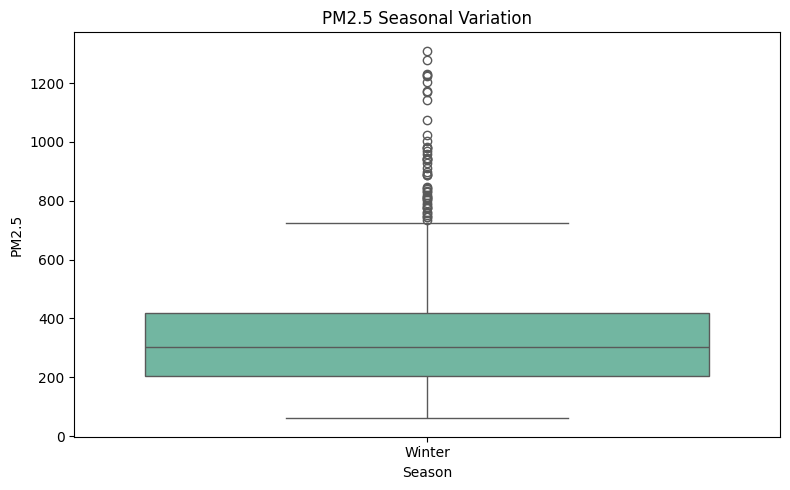

/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


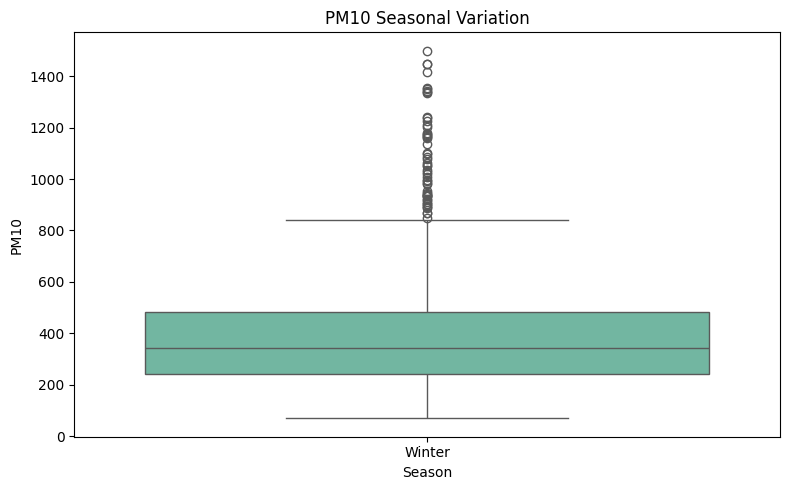

/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


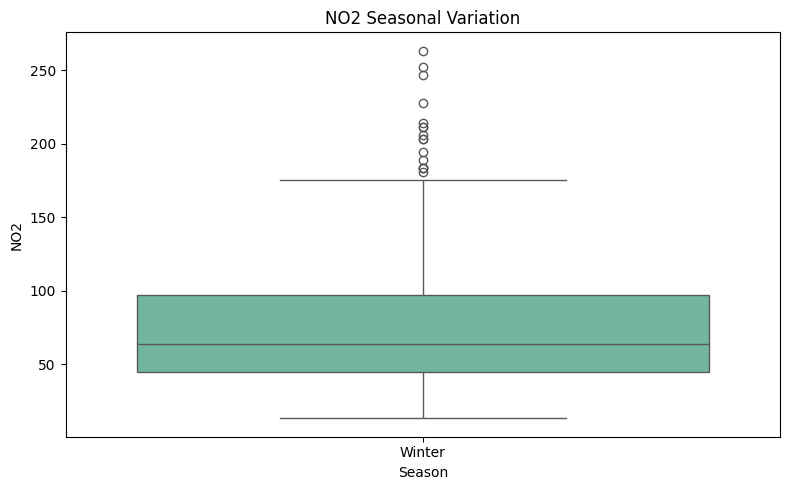

/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


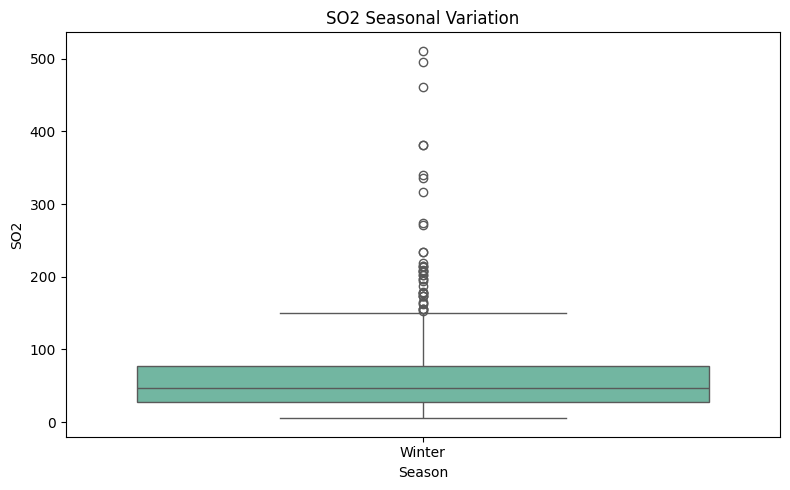

/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


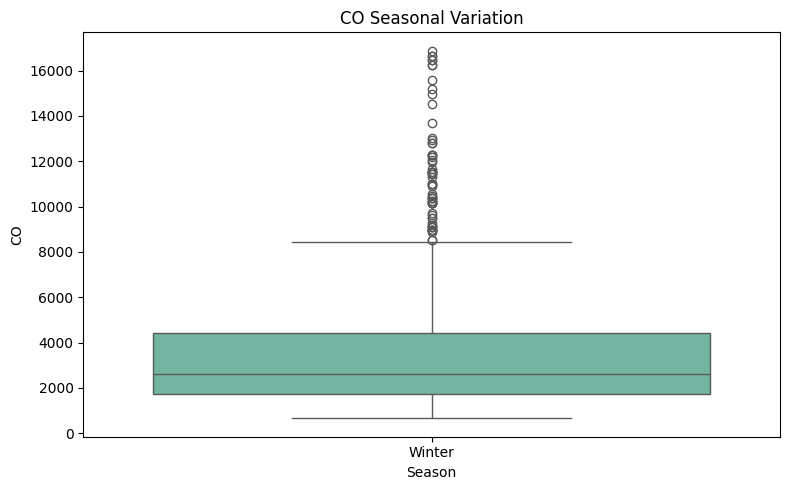

/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


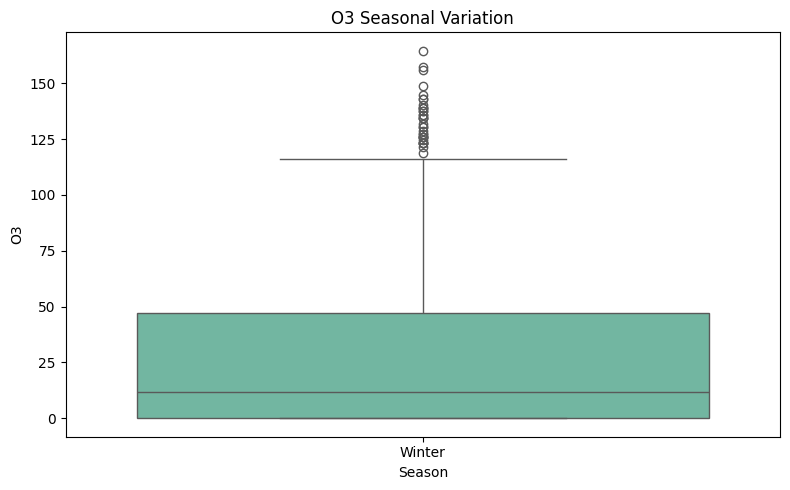

/tmp/ipython-input-8-3130761020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y=col, data=df, palette="Set2")


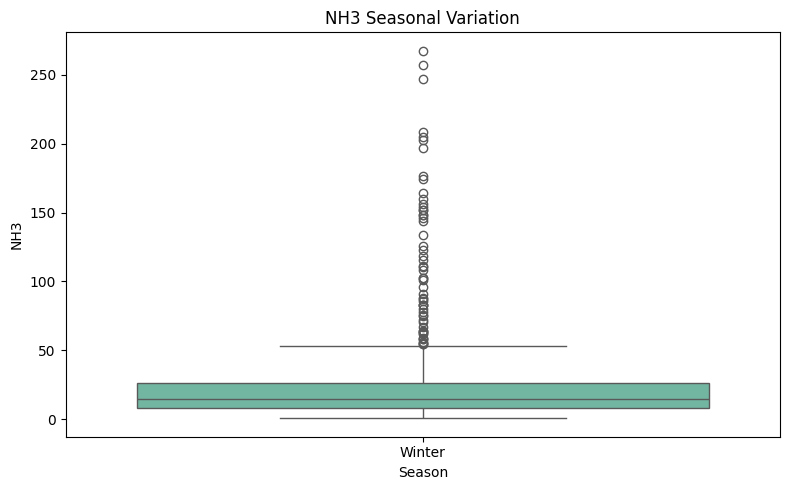

In [8]:
# 📊 Seasonal Boxplots
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "NH3"]

for col in pollutants:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Season", y=col, data=df, palette="Set2")
    plt.title(f"{col} Seasonal Variation")
    plt.tight_layout()
    plt.savefig(f"output/graphs/{col}_seasonal_boxplot.png")
    plt.show()


**🔗 Correlation Heatmap of Pollutants**

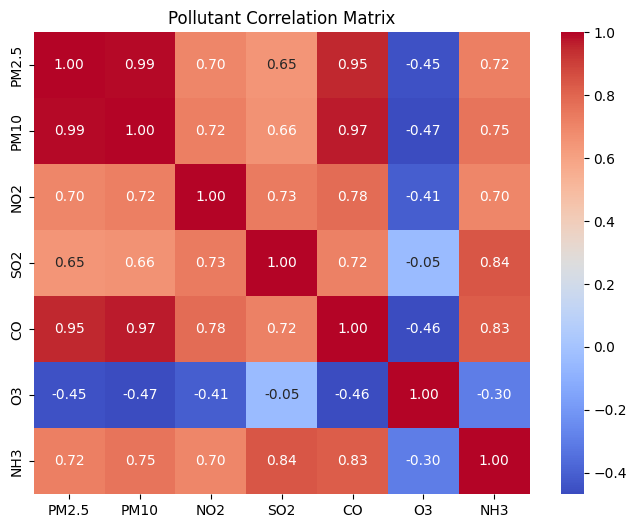

In [13]:
# ✅ Step 4: Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pollutant Correlation Matrix")
plt.show()


 **📈 Linear Regression to Predict PM2.5**

In [14]:
# ✅ Step 5: Linear Regression — Predict PM2.5

X = df[["PM10", "NO2", "SO2", "CO", "O3", "NH3"]]
y = df["PM2.5"]

lr_model = LinearRegression()
lr_model.fit(X, y)

y_pred_lr = lr_model.predict(X)
r2_lr = r2_score(y, y_pred_lr)

print(f"📈 Linear Regression R² Score: {r2_lr:.4f}")
for name, coef in zip(X.columns, lr_model.coef_):
    print(f"{name}: {coef:.4f}")


📈 Linear Regression R² Score: 0.9921
PM10: 0.8813
NO2: -0.2424
SO2: 0.3337
CO: 0.0006
O3: -0.0313
NH3: -0.7831


**🧠 Random Forest Regression for PM2.5**

🧠 Random Forest R² Score: 0.9986


/tmp/ipython-input-15-1526492378.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


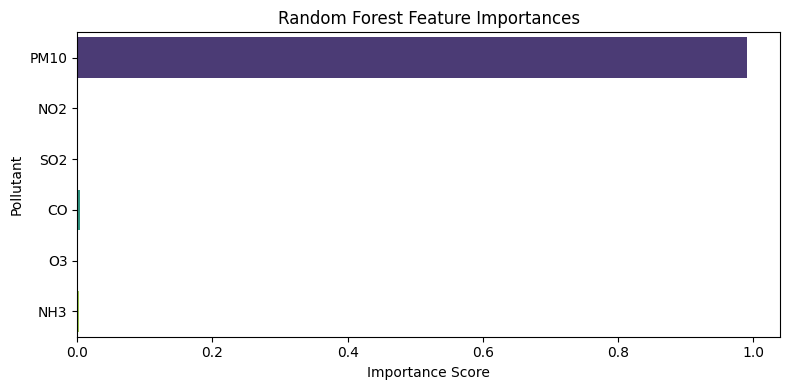

In [15]:
# ✅ Step 6: Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X)
r2_rf = r2_score(y, y_pred_rf)

print(f"🧠 Random Forest R² Score: {r2_rf:.4f}")

# Feature Importance Barplot
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Pollutant")
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-758138029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(importances.values()), y=list(importances.keys()), palette="viridis")


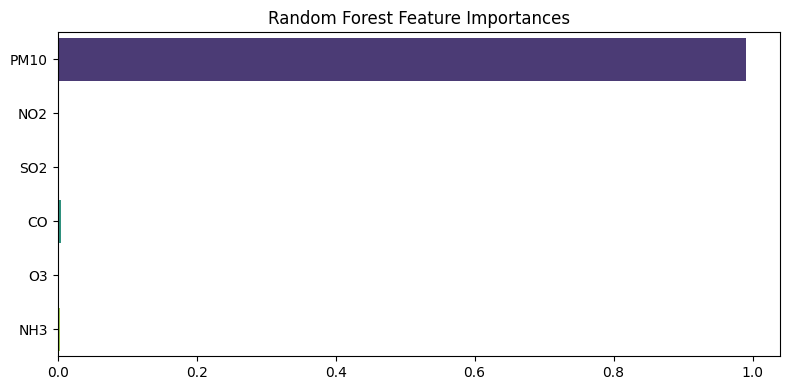

In [11]:
# Plot Random Forest Feature Importances
plt.figure(figsize=(8, 4))
sns.barplot(x=list(importances.values()), y=list(importances.keys()), palette="viridis")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.savefig("output/graphs/random_forest_importance.png")
plt.show()


In [12]:
# 📝 Generate Markdown-style report
from tabulate import tabulate

report = f"""# Delhi AQI Analysis Report

**Linear Regression R² Score:** {r2_lr:.4f}
**Random Forest R² Score:** {r2_rf:.4f}

## Seasonal Averages
{tabulate(seasonal_avg, headers='keys', tablefmt='github')}

## Feature Importances (Random Forest)
{tabulate(importances.items(), headers=["Pollutant", "Importance"], tablefmt="github")}

---

Graphs and data saved in the `output/graphs/` and `output/` folders.
"""

with open("output/regression_results.txt", "w", encoding="utf-8") as f:
    f.write(report)

print("✅ Report saved as output/regression_results.txt")


✅ Report saved as output/regression_results.txt


**📋 Average AQI Levels by Season**

In [16]:
# ✅ Step 7: Seasonal Averages Table

seasonal_avg = df.groupby("Season")[pollutants].mean().round(2)
display(seasonal_avg.style.background_gradient(cmap="YlGnBu"))


,PM2.5,PM10,NO2,SO2,CO,O3,NH3
Season,,,,,,,
Winter,358.260000,420.990000,75.290000,64.660000,3814.940000,30.140000,26.430000
